<H1>FEATURE ENGINEERING AND EXTRACTION - USED DEVICE PRICE PREDICTION</H1>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Load the Data</h2>

In [4]:
df = pd.read_csv('../data/sales_clean.csv')

In [5]:
df

,Unnamed: 0,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,0,Honor,Android,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,1,Honor,Android,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,2,Honor,Android,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,3,Honor,Android,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,4,Honor,Android,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,3447,Apple,iOS,15.27,1,0,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,5.100902,6.287933
3251,3450,Asus,Android,15.24,1,0,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3252,3451,Alcatel,Android,15.80,1,0,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3253,3452,Alcatel,Android,15.80,1,0,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,Apple,iOS,15.27,1,0,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,5.100902,6.287933
3251,Asus,Android,15.24,1,0,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3252,Alcatel,Android,15.80,1,0,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3253,Alcatel,Android,15.80,1,0,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


<h2>Feature Selection</h2>

It is important to ensure that only the necessary features are selected to optimize the performance of the predictive models that will be used in this project. The first step of this stage is to transform all the data into numerical form so that we can see correlation between all variables.

In [8]:
df.shape

(3255, 15)

In [9]:
df_corr = df
df_corr['device_brand'] = LabelEncoder().fit_transform(df['device_brand'])
df_corr['os'] = LabelEncoder().fit_transform(df['os'])

#df = pd.get_dummies(df)

In [10]:
df_corr

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,10,0,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,10,0,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,10,0,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,10,0,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,10,0,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,2,3,15.27,1,0,8.0,7.0,64.0,4.0,3110.0,194.0,2019,208,5.100902,6.287933
3251,3,0,15.24,1,0,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3252,1,0,15.80,1,0,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3253,1,0,15.80,1,0,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188


<AxesSubplot:>

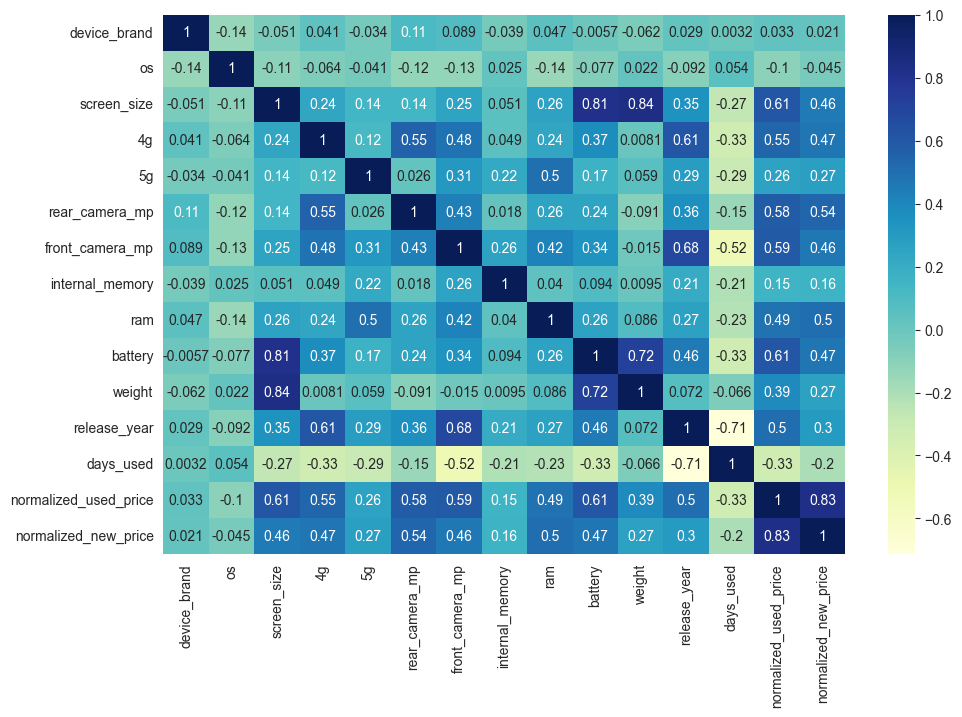

In [11]:
plt.figure(figsize=(11,7))
sns.heatmap(df_corr.corr(), cmap="YlGnBu", annot=True)

Some variables are highly correlated such as screen size and weight. Screen size has a much higher correlation with the target variable. The next section shall be Feature Selection, where this will be taken into consideration.

In [12]:
df.to_csv('../data/notprepared_data')

<h2>Splitting Data into Train and Test</h2>

In [13]:
x = df_corr.drop('normalized_used_price', axis=1)
y = df_corr['normalized_used_price']

In [14]:
x.shape

(3255, 14)

In [15]:
y.shape

(3255,)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [17]:
x_train.shape

(2441, 14)

In [18]:
y_train.shape

(2441,)

<h2>Feature Selection</h2>

Reducing the amount of features can be beneficial for a lot of predictive models. It can reduce the amount of complexity that the model would have to navigate helping it to pick out patterns much better from only features that have an impact on the target variable. In addition, independent variables that have extremely high correlation may be communicating the same thing which would only complicate the predictive model's process. An example of this can be the screen size and the weight of the device. They have a pearson's correlation value of 0.84 which is very high. At the same time, it is very possible that users could want a device with a longer battery life or a device with a large screen. A large screen also consumes a lot of battery which could be necessitating a larger battery (heavier battery). In other words, while they may be highly correlated, it does not necessarily mean that there is causation.

In [19]:
x_train

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_new_price
2702,29,0,15.90,1,0,13.0,16.0,64.0,4.00,3260.0,149.3,2019,375,5.356020
1220,11,0,25.43,1,0,8.0,8.0,16.0,4.00,6660.0,310.0,2017,599,5.515242
2524,26,0,7.62,0,0,2.0,1.3,16.0,4.00,1200.0,100.5,2013,715,4.500920
2263,26,0,15.34,1,0,12.0,8.0,32.0,4.00,4000.0,169.0,2019,220,5.308317
1845,17,0,7.75,0,0,2.0,0.3,512.0,0.25,1500.0,118.0,2013,1008,4.217005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,11,0,15.90,1,0,13.0,32.0,128.0,6.00,3750.0,174.0,2019,489,5.313945
640,3,0,23.04,1,0,8.0,5.0,32.0,4.00,7800.0,490.0,2017,588,5.993288
213,11,0,16.23,1,0,13.0,8.0,64.0,4.00,4000.0,176.0,2019,253,5.016220
905,23,0,20.42,1,0,8.0,2.0,16.0,4.00,5900.0,305.0,2014,939,5.517332


In [20]:
kbest = SelectKBest(f_regression, k=10)
new_df = kbest.fit_transform(x_train, y_train, )

In [21]:
new_df.shape

(2441, 10)

In [22]:
features = kbest.get_feature_names_out()
features

array(['screen_size', '4g', 'rear_camera_mp', 'front_camera_mp', 'ram',
       'battery', 'weight', 'release_year', 'days_used',
       'normalized_new_price'], dtype=object)

In [23]:
variables = list(features[0:10])
variables.append('normalized_used_price')
variables

['screen_size',
 '4g',
 'rear_camera_mp',
 'front_camera_mp',
 'ram',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'normalized_new_price',
 'normalized_used_price']

In [24]:
new_df = df[variables]

In [25]:
new_df

,screen_size,4g,rear_camera_mp,front_camera_mp,ram,battery,weight,release_year,days_used,normalized_new_price,normalized_used_price
0,14.50,1,13.0,5.0,3.0,3020.0,146.0,2020,127,4.715100,4.307572
1,17.30,1,13.0,16.0,8.0,4300.0,213.0,2020,325,5.519018,5.162097
2,16.69,1,13.0,8.0,8.0,4200.0,213.0,2020,162,5.884631,5.111084
3,25.50,1,13.0,8.0,6.0,7250.0,480.0,2020,345,5.630961,5.135387
4,15.32,1,13.0,8.0,3.0,5000.0,185.0,2020,293,4.947837,4.389995
...,...,...,...,...,...,...,...,...,...,...,...
3250,15.27,1,8.0,7.0,4.0,3110.0,194.0,2019,208,6.287933,5.100902
3251,15.24,1,13.0,8.0,8.0,4000.0,200.0,2018,541,6.251538,5.037732
3252,15.80,1,13.0,5.0,3.0,4000.0,165.0,2020,201,4.528829,4.357350
3253,15.80,1,13.0,5.0,2.0,4000.0,160.0,2020,149,4.624188,4.349762


In [26]:
new_df

,screen_size,4g,rear_camera_mp,front_camera_mp,ram,battery,weight,release_year,days_used,normalized_new_price,normalized_used_price
0,14.50,1,13.0,5.0,3.0,3020.0,146.0,2020,127,4.715100,4.307572
1,17.30,1,13.0,16.0,8.0,4300.0,213.0,2020,325,5.519018,5.162097
2,16.69,1,13.0,8.0,8.0,4200.0,213.0,2020,162,5.884631,5.111084
3,25.50,1,13.0,8.0,6.0,7250.0,480.0,2020,345,5.630961,5.135387
4,15.32,1,13.0,8.0,3.0,5000.0,185.0,2020,293,4.947837,4.389995
...,...,...,...,...,...,...,...,...,...,...,...
3250,15.27,1,8.0,7.0,4.0,3110.0,194.0,2019,208,6.287933,5.100902
3251,15.24,1,13.0,8.0,8.0,4000.0,200.0,2018,541,6.251538,5.037732
3252,15.80,1,13.0,5.0,3.0,4000.0,165.0,2020,201,4.528829,4.357350
3253,15.80,1,13.0,5.0,2.0,4000.0,160.0,2020,149,4.624188,4.349762


In [27]:
new_df.to_csv('../data/selected_data')